# HDSAviz Technology Review  
----
<img src="doc/images/Network_graph.png">
The High Dimensionality Sensitivity Analysis toolkit is being developed as an add-on to an existing package for global sensitivity analyses, SALib.  Our package is motivated by a specific project, but is generalizable to visualize any outputs from a Sobol analysis using SALib (or similarly formatted results from another tool).

## -Motivation-
- We have a mathematical model that simulates the pyrolysis of lignin and predicts values for 30 output measures of interest (yields of various molecules, lumped species, or functional groups).  
- End users would like to know certain output measures precisely, but have limited time/resources to invest in generating the best possible estimates for the 410 input parameters.
- A global sensitivity analysis can inform the end user which parameters they should spend time optimizing and which they can ignore for specific output measures.

#### Unfortunately, exploring the sensitivity analysis results is challenging with basic visualizations:

<img src="doc/images/Motivation.png">

## -HDSAviz design-

<img src="doc/images/savvy_diagram.png">

## -SALib-
**Sobol analysis**: variance-based analysis that generates sensitivity indices that measure the contribution of input parameters to the variance in model output.

**Requirements:**  
- Numpy, Scipy, matplotlib

**MIT License**

**Alternatives:**  
- No currently supported alternatives in Python
- `sensitivity` package in R
- Matlab implementations

## -SALib-

**Advantages:**  
- open source
- pip install
- recently compatible with Python 3
- package author is very accessible

**Disadvantages:**  
- computationally expensive

# Choosing a Visualization Method
## -Requirements-

- An ability to receive and handle large data sets


- Create appealing visualizations that are not overwhelming


- Provide options to display a variety of information


- Allow for easy user interaction for modifying data output
  and tuning appearance for presentation/analysis



## -Why Bokeh?-

From the website:

>"Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. Its goal is to provide elegant, concise construction of novel graphics in the style of D3.js, and to extend this capability with high-performance interactivity over very large or streaming datasets. Bokeh can help anyone who would like to quickly and easily create interactive plots, dashboards, and data applications."

 

## -Brief Overview-

- Easily Installed through pip install bokeh or conda install bokeh

    
- NOTE: Issues may arise if not consistent across users!
   

- Large library of examples available and plenty of information on Stacked Overflow for troubleshooting(for most things)


- Available in other programming languages (R, Scala, Julia)





## -Brief Overview-

No dependencies on other libraries.
- However recommended that Numpy, Pandas, Jinja2, Six, Requests, Tornado PyYaml, and DateUtil are installed

Three main interfaces for creating visualizations:
1. models - low level, but most flexible for sophisticated coders to manipulate 

2. plotting - intermediate level

3. charts - higher level, easier to use for novice users

## -Our project-
Major components in constructing plots:

1) ColumnDataSource (bokeh.plotting): A map of headers linked to an array or list. Holds all relevant information to display or construct figure.

- We to store values, titles, confidence intervals, etc.
- Can receive dictionary or panda dataframe as an argument
    
        Ex: pandadata = pd.DataFrame({
                                     'Param': pd.Series(df.Parameter),
                                     'Colors': np.array(sTcolor),
                                     'Conf': pd.Series.append(df.ST_conf),
                                     'Order': np.append(totalorder),
                                       ...
                                     })
        pandadata_cds = ColumnDataSource(pdata)


## -Our project-
Major components in constructing plots:
    
2) Glyphs (bokeh.plotting): The building blocks used to construct plots. Available in a variety of visualizations from basic elements (ex: lines, bars, circles) to complex pieces (ex: annular wedge, patches)

- We utilize annular edge to construct the plot and connect the visualizations to the ColumnDataSource
    
- For our plot we specify: location, inner/outer radii, start/stop angles, and colors

            Ex: p.annular_wedge(x='x', y='y', inner_radius='IR',
                                outer_radius='OR',
                                start_angle='starts',
                                end_angle='stops',
                                color='Colors',
                                source=pandadata_cds
                                )

## -Our project-
Major components in constructing plots:
    
3) Tools (bokeh.models): Basic user interactions for manipulating plot appearance. 
    
- Call for zooming, resize, reset, hovertool, and preview save: 
    plottools = "hover, wheel_zoom, save, reset, resize" 
    
- Information to be displayed by hover tool is executed in one line 
        hover.tooltips = [("Order", "@Order"), ("Parameter", "@Param"),
                          ("Sensitivity", "@Sens"), ("Confidence", "@Conf")]
                          
- Hover tool can also be set to only apply to certain glyphs 
    
        hoverable = p.annular_wedge(x='x', y='y', inner_radius='ymin',
                                    outer_radius='ymax',
                                    start_angle='starts',
                                    end_angle='stops',
                                    color='Colors',
                                    source=pdata_s
                                    )
        hover.renderers = [hoverable]




In [3]:
import warnings; warnings.filterwarnings('ignore')
from bokeh.plotting import show, output_notebook
import savvy.data_processing as dp
import savvy.interactive_plots as ip
from savvy.plotting import make_plot, make_second_order_heatmap
import savvy.network_tools as nt

output_notebook()
sa_dict = dp.get_sa_data('../HDSAviz_data/')

Loading BokehJS ...

In [4]:
# demo of making the 1st and total order sensitivity index plot
df = sa_dict['totaltars'][0]
output_notebook()
p = make_plot(df, lgaxis=True, minvalues=0.0, top=25, stacked=True,
              errorbar=True, showS1=True, showST=True, highlight=['Tmax'])
show(p)

Loading BokehJS ...

## -Our project-
Major components in constructing plots:
    
4) Bar (bokeh.charts): Function provided in charts interface to construct a bar chart. Very little interaction available, but implemented with little effort

            p = Bar(data, values=['Sensitivity'], label=['Parameter'],
                    group=['Order'], legend='top_right',
                    color=["#31a354", "#a1d99b"], ylabel='Sensitivity Indices')

In [5]:
df = sa_dict['totaltars'][0]
output_notebook()
p = make_plot(df, lgaxis=True, minvalues=0.0, top=5, stacked=True,
              errorbar=True, showS1=True, showST=True)
show(p)

Loading BokehJS ...

In [6]:
# demo of the second order sensitivity index heatmap
df2 = sa_dict['totaltars'][1]
output_notebook()
# incl_lst = ['Tmax', 'Carbon', 'Hydrogen', 'k38', 'k48', 'k34']
show(make_second_order_heatmap(df2, top=5, mirror=True))

Loading BokehJS ...

## -Requirements for interactive user interface-

- **Tabs widget** - Ability to choose specific outcomes that a user wants to see. 
- **Check Box widgets** - Ability to showcase error bars and change axis from log to linear upon request.
- **Bounded text with float values widgets** - Ability to select how many parameters to showcase and minimum sensitivity ()
- **Select Multiple parameters widget** - Ability to Highlight certain parameters in all plots. 

## -Choice of tools-
- Bokeh
- Ipywidgets

## -IPywidgets-

**License :** 
Modified BSD License

**Advantages**
- pip install and conda install availiable.
- easy to use inside Jupyter notebooks for instant prototyping.
- Tutorials section available and easy to grasp (takes 30-60 minutes to run through them all).
- All requirements for widgets for our needs are met
- Very tunable features with JSON type Javascript code

**Disadvantages**
- Gets slow as data size gets bigger
- cannot be used outside of notebooks very easily
- Compatibility issues with Bokeh Widgets as they cannot be chained together
- Javascript Knowledge is needed to run widgets outside of notebook
- we cannot get HTML pages as can be done with Bokeh

## -Bokeh-

**License:**
BSD 3-clause "new" or "Revised" license

**Advantages**
- pip install and conda install availiable.
- easy to use inside Jupyter notebooks for instant prototyping as well as outside notebooks.
- generates html files that can be hosted on websites after data analysis.
- Documentaion is great with plenty of useful examples and variety of plots.
- Model and plotting interfaces (and glyphs) make customization easy
- Chart interfaces allows for basic plots to be done with no hassle
- All requirements for widgets for our needs are met
- Changes with Javascript coding can make it extremely powerful.
- We are using it for plotting and thus it might be better to use its own widgets as opposed to Ipywidgets.

**Disadvantages**
- Some widgets and customizable interactions rely on Javascript and thus not useful for people reliant only on Python.
- There is a learning curve for more sophisticated figures and interactions.

## Demo Code with interactivity

In [7]:
ip.interact_with_make_plot(sa_dict)

## -graph-tool-
Python package for manipulating, visualizing, and analyzing graphs

**Requirements:**
- a C++ compiler
- Boost libraries
- expat
- Scipy
- Numpy
- CGAL C++ library

**Alternatives:**
- there seem to be a variety of Python alternatives
- D3

**GNU GPL License**

Created a graph with 40 vertices and 780 edges.
Vertices are the top 40 ST values greater than 0.005.
Only S2 values (edges) greater than 0.0 are included.


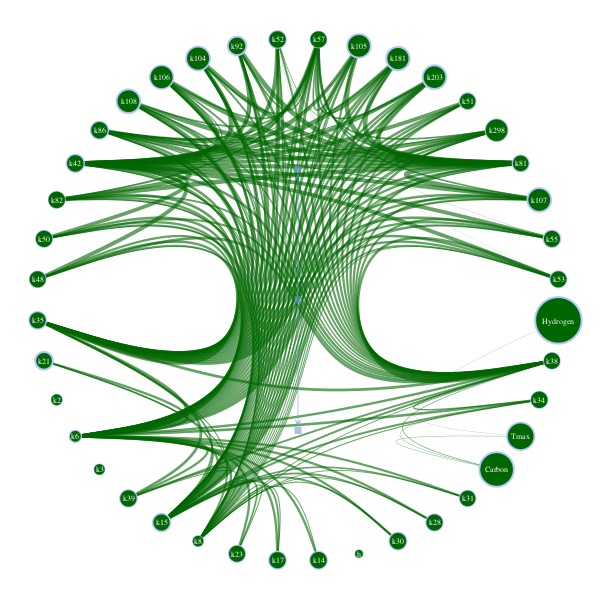

In [8]:
# demo of building a graph to show total and second order indices
g = nt.build_graph(sa_dict['totaltars'], sens='ST', top=40, min_sens=0.005,
                   edge_cutoff=0.0)
nt.plot_network_circle(g, inline=True)

In [ ]:
nt.plot_network_circle(g, inline=False)

## -graph-tool-

**Advantages:**
- very well documented; easy to learn basic network construction
- most of the core functionality is written in C++ (faster)

**Disadvantages:**
- A lot of dependencies that are incompatible with pip or conda install
- challenging to install on some systems (esp. Windows)
- most of the core functionality is written in C++ (hard to modify without knowing C++)

# The End